In [13]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statistics
import random
from sklearn.linear_model import LinearRegression

In [14]:
#Read the Data File and store into Pandas DataFrames
filepath="../Resource/labs.csv"
df= pd.read_csv(filepath)
df.head(10)


,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1
5,73562,123.0,123.0,74.0,6541.6,166.22,NaN,NaN,NaN,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,553.5
6,73563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,19.0,19.0,242.0,21392.8,7.85,134054.109760,77.0,0.77,3.9,...,0.253,0.0,0.115,0.0,0.0309,0.0,NaN,21.28,668.0,493.0
8,73566,1.3,1.3,18.0,1591.2,7.22,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.0,279.0
9,73567,35.0,35.0,215.0,19006.0,16.28,NaN,NaN,NaN,4.0,...,0.148,0.0,0.078,0.0,0.0436,0.0,NaN,6.07,194.0,143.2


In [15]:
#defining the selected variables and extracting the table from the main data
cols_to_clean = ['SEQN','LBXTHG', 'LBXBSE', 'LBXBPB', 'LBXBMN', 'LBXBCD', 'LBXTR', 'LBDLDL', 'LBDHDD']
variable_df=df[cols_to_clean]
variable_df.head()

,SEQN,LBXTHG,LBXBSE,LBXBPB,LBXBMN,LBXBCD,LBXTR,LBDLDL,LBDHDD
0,73557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0
1,73558,1.21,204.73,1.69,8.15,0.20,NaN,NaN,50.0
2,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
3,73560,0.88,169.82,0.37,13.07,0.07,NaN,NaN,61.0
4,73561,NaN,NaN,NaN,NaN,NaN,75.0,101.0,85.0


In [16]:
#dropping the rows with null cells
for col in variable_df:
    variable_df = variable_df.dropna(subset=[col])

In [17]:
variable_df.dtypes

SEQN        int64
LBXTHG    float64
LBXBSE    float64
LBXBPB    float64
LBXBMN    float64
LBXBCD    float64
LBXTR     float64
LBDLDL    float64
LBDHDD    float64
dtype: object

In [18]:
#renaming the variables
df2=variable_df.rename(columns={
    "SEQN":"patient ID",
    "LBXTHG":"mercury (ug/L)", 
    "LBXBSE":"selenium(ug/L)", 
    "LBXBPB":"lead(ug/dL)", 
    "LBXBMN": "manganese(ug/L)", 
    "LBXBCD":"cadmium(ug/L)", 
    "LBXTR":"triglycerides(mg/dL)", 
    "LBDLDL":"LDL-cholesterol(mg/dL)", 
    "LBDHDD":"HDL-Cholesterol(mg/dL)",
})

In [19]:
#double check the clean data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1555 entries, 2 to 9799
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patient ID              1555 non-null   int64  
 1   mercury (ug/L)          1555 non-null   float64
 2   selenium(ug/L)          1555 non-null   float64
 3   lead(ug/dL)             1555 non-null   float64
 4   manganese(ug/L)         1555 non-null   float64
 5   cadmium(ug/L)           1555 non-null   float64
 6   triglycerides(mg/dL)    1555 non-null   float64
 7   LDL-cholesterol(mg/dL)  1555 non-null   float64
 8   HDL-Cholesterol(mg/dL)  1555 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 121.5 KB


In [20]:
df2.head()

,patient ID,mercury (ug/L),selenium(ug/L),lead(ug/dL),manganese(ug/L),cadmium(ug/L),triglycerides(mg/dL),LDL-cholesterol(mg/dL),HDL-Cholesterol(mg/dL)
2,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
7,73564,0.42,195.62,1.00,16.80,0.37,64.0,97.0,58.0
21,73580,0.46,188.00,0.31,4.22,0.07,57.0,159.0,55.0
48,73607,0.33,219.00,1.35,8.31,0.50,139.0,103.0,30.0
62,73621,0.87,212.84,1.38,8.14,0.36,78.0,70.0,75.0


In [21]:
# Reset Index
lab_df = df2.reset_index(drop = True)
lab_df.head()

,patient ID,mercury (ug/L),selenium(ug/L),lead(ug/dL),manganese(ug/L),cadmium(ug/L),triglycerides(mg/dL),LDL-cholesterol(mg/dL),HDL-Cholesterol(mg/dL)
0,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
1,73564,0.42,195.62,1.00,16.80,0.37,64.0,97.0,58.0
2,73580,0.46,188.00,0.31,4.22,0.07,57.0,159.0,55.0
3,73607,0.33,219.00,1.35,8.31,0.50,139.0,103.0,30.0
4,73621,0.87,212.84,1.38,8.14,0.36,78.0,70.0,75.0


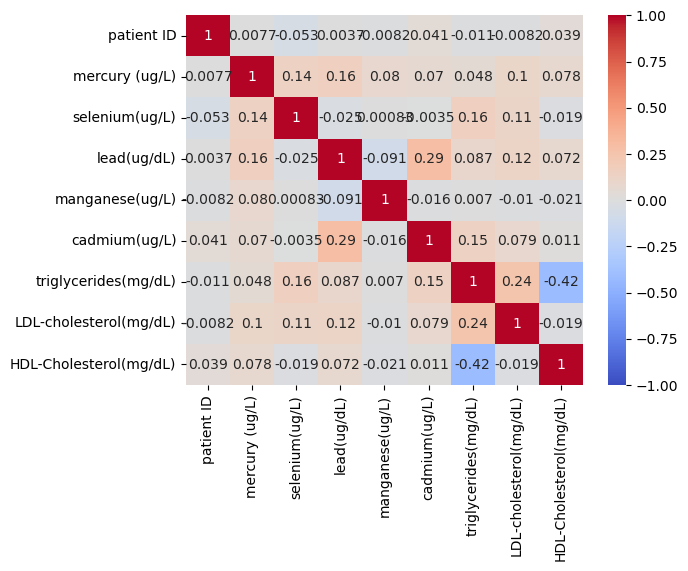

In [22]:
corr_matrix = lab_df.corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.show()

In [23]:
# set diagonal elements to zero
corr_matrix.values[[i for i in range(corr_matrix.shape[0])], [i for i in range(corr_matrix.shape[0])]] = 0

# print the correlation matrix with diagonal elements set to zero
print(corr_matrix)

                        patient ID  mercury (ug/L)  selenium(ug/L)   
patient ID                0.000000        0.007720       -0.053107  \
mercury (ug/L)            0.007720        0.000000        0.135168   
selenium(ug/L)           -0.053107        0.135168        0.000000   
lead(ug/dL)               0.003745        0.156329       -0.024954   
manganese(ug/L)          -0.008162        0.079885        0.000831   
cadmium(ug/L)             0.040856        0.069933       -0.003515   
triglycerides(mg/dL)     -0.010643        0.048068        0.156563   
LDL-cholesterol(mg/dL)   -0.008249        0.102874        0.114189   
HDL-Cholesterol(mg/dL)    0.038680        0.077589       -0.019119   

                        lead(ug/dL)  manganese(ug/L)  cadmium(ug/L)   
patient ID                 0.003745        -0.008162       0.040856  \
mercury (ug/L)             0.156329         0.079885       0.069933   
selenium(ug/L)            -0.024954         0.000831      -0.003515   
lead(ug/dL)    

In [24]:
# stack the correlation matrix and sort by correlation coefficient
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# print the top 10 correlation pairs
print(corr_pairs[:20])

cadmium(ug/L)           lead(ug/dL)               0.291458
lead(ug/dL)             cadmium(ug/L)             0.291458
LDL-cholesterol(mg/dL)  triglycerides(mg/dL)      0.244445
triglycerides(mg/dL)    LDL-cholesterol(mg/dL)    0.244445
                        selenium(ug/L)            0.156563
selenium(ug/L)          triglycerides(mg/dL)      0.156563
lead(ug/dL)             mercury (ug/L)            0.156329
mercury (ug/L)          lead(ug/dL)               0.156329
cadmium(ug/L)           triglycerides(mg/dL)      0.146854
triglycerides(mg/dL)    cadmium(ug/L)             0.146854
mercury (ug/L)          selenium(ug/L)            0.135168
selenium(ug/L)          mercury (ug/L)            0.135168
lead(ug/dL)             LDL-cholesterol(mg/dL)    0.118457
LDL-cholesterol(mg/dL)  lead(ug/dL)               0.118457
                        selenium(ug/L)            0.114189
selenium(ug/L)          LDL-cholesterol(mg/dL)    0.114189
mercury (ug/L)          LDL-cholesterol(mg/dL)    0.1028

In [25]:
# most relevant correlations are between "selenium(ug/L)" and "triglycerides(mg/dL)", "cadmium(ug/L)" and "triglycerides(mg/dL)"
# "lead(ug/dL)" and "LDL-cholesterol(mg/dL)" & "selenium(ug/L)" and "LDL-cholesterol(mg/dL)"
# create new dataframe with only relevant fields
red_lab_df = lab_df[["patient ID","selenium(ug/L)","cadmium(ug/L)","lead(ug/dL)","triglycerides(mg/dL)", "LDL-cholesterol(mg/dL)" ]]
red_lab_df.head()

,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),LDL-cholesterol(mg/dL)
0,73559,209.64,0.22,1.45,51.0,56.0
1,73564,195.62,0.37,1.00,64.0,97.0
2,73580,188.00,0.07,0.31,57.0,159.0
3,73607,219.00,0.50,1.35,139.0,103.0
4,73621,212.84,0.36,1.38,78.0,70.0


In [26]:
# define the bins and labels for "triglycerides(mg/dL)" according to 
# "https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/triglycerides/art-20048186"
bins = [0, 150, 200, 500, float('inf')]
labels = ['Normal', 'Borderline high', 'High', 'Very high']

# create a new column with the bin labels
red_lab_df['triglycerides_class'] = pd.cut(red_lab_df['triglycerides(mg/dL)'], bins=bins, labels=labels)

# define the bins and labels for "LDL-cholesterol(mg/dL)" acccording to 
# "https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601"
bins = [0, 130, 160, 190, float('inf')]
labels = ['Normal', 'Borderline high', 'High', 'Very high']

# create a new column with the bin labels
red_lab_df['LDL-cholesterol_class'] = pd.cut(red_lab_df['LDL-cholesterol(mg/dL)'], bins=bins, labels=labels)

# reorganize columns
new_column_order = ['patient ID', 'selenium(ug/L)', 'cadmium(ug/L)', 'lead(ug/dL)', 'triglycerides(mg/dL)', 'triglycerides_class', 'LDL-cholesterol(mg/dL)', 'LDL-cholesterol_class']
red_lab_df = red_lab_df.reindex(columns=new_column_order)

red_lab_df.sample(20)

C:\Users\Victor\AppData\Local\Temp\ipykernel_12704\1840819987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_lab_df['triglycerides_class'] = pd.cut(red_lab_df['triglycerides(mg/dL)'], bins=bins, labels=labels)
C:\Users\Victor\AppData\Local\Temp\ipykernel_12704\1840819987.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_lab_df['LDL-cholesterol_class'] = pd.cut(red_lab_df['LDL-cholesterol(mg/dL)'], bins=bins, labels=labels)


,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),triglycerides_class,LDL-cholesterol(mg/dL),LDL-cholesterol_class
526,77096,182.83,0.41,1.25,132.0,Normal,54.0,Normal
561,77355,192.71,0.25,0.75,180.0,Borderline high,66.0,Normal
491,76860,206.43,1.03,1.28,144.0,Normal,140.0,Borderline high
428,76455,181.30,0.20,1.40,54.0,Normal,144.0,Borderline high
116,74393,188.74,1.78,1.47,101.0,Normal,71.0,Normal
1173,81100,213.00,0.57,1.01,107.0,Normal,57.0,Normal
1424,82802,176.42,0.32,0.90,34.0,Normal,62.0,Normal
863,79268,194.97,0.64,2.07,40.0,Normal,117.0,Normal
412,76342,238.44,0.17,0.70,56.0,Normal,84.0,Normal
830,79088,206.20,0.07,0.16,75.0,Normal,122.0,Normal


In [27]:
# calculate mean, median, mode, average, quartiles, IQR, and lower/upper boundaries for metal concentrations

columns = ["selenium(ug/L)", "cadmium(ug/L)", "lead(ug/dL)"]
for col in columns:
    mean = round(red_lab_df[col].mean(), 2)
    median = round(red_lab_df[col].median(), 2)
    mode = round(red_lab_df[col].mode()[0], 2)
    stdev = round(red_lab_df[col].std(), 2)
    quartiles = red_lab_df[col].quantile([0.25, 0.5, 0.75])
    q1, q2, q3 = quartiles
    iqr = round(q3 - q1, 2)
    lower_boundary = round(q1 - 1.5 * iqr, 2)
    upper_boundary = round(q3 + 1.5 * iqr, 2)

    # calculate number of outliers
    lower_outliers = red_lab_df[red_lab_df[col] < lower_boundary]
    upper_outliers = red_lab_df[red_lab_df[col] > upper_boundary]
    num_lower_outliers = len(lower_outliers)
    num_upper_outliers = len(upper_outliers)
    
    # print results
    print("For", col)
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    print("Standard Deviation:", stdev)
    print("First Quartile:", round(q1, 2))
    print("Second Quartile (Median):", round(q2, 2))
    print("Third Quartile:", round(q3, 2))
    print("Interquartile Range (IQR):", iqr)
    print("Lower Boundaries for Outliers:", lower_boundary)
    print("Upper Boundaries for Outliers:", upper_boundary)
    print("Number of Lower Outliers:", num_lower_outliers)
    print("Number of Upper Outliers:", num_upper_outliers)
    print("-----------------------------------------------")


For selenium(ug/L)
Mean: 196.81
Median: 194.69
Mode: 182.56
Standard Deviation: 23.96
First Quartile: 181.28
Second Quartile (Median): 194.69
Third Quartile: 209.23
Interquartile Range (IQR): 27.95
Lower Boundaries for Outliers: 139.36
Upper Boundaries for Outliers: 251.16
Number of Lower Outliers: 7
Number of Upper Outliers: 30
-----------------------------------------------
For cadmium(ug/L)
Mean: 0.44
Median: 0.26
Mode: 0.07
Standard Deviation: 0.53
First Quartile: 0.15
Second Quartile (Median): 0.26
Third Quartile: 0.53
Interquartile Range (IQR): 0.38
Lower Boundaries for Outliers: -0.42
Upper Boundaries for Outliers: 1.1
Number of Lower Outliers: 0
Number of Upper Outliers: 126
-----------------------------------------------
For lead(ug/dL)
Mean: 1.22
Median: 0.92
Mode: 0.42
Standard Deviation: 1.15
First Quartile: 0.54
Second Quartile (Median): 0.92
Third Quartile: 1.47
Interquartile Range (IQR): 0.93
Lower Boundaries for Outliers: -0.85
Upper Boundaries for Outliers: 2.87
Number

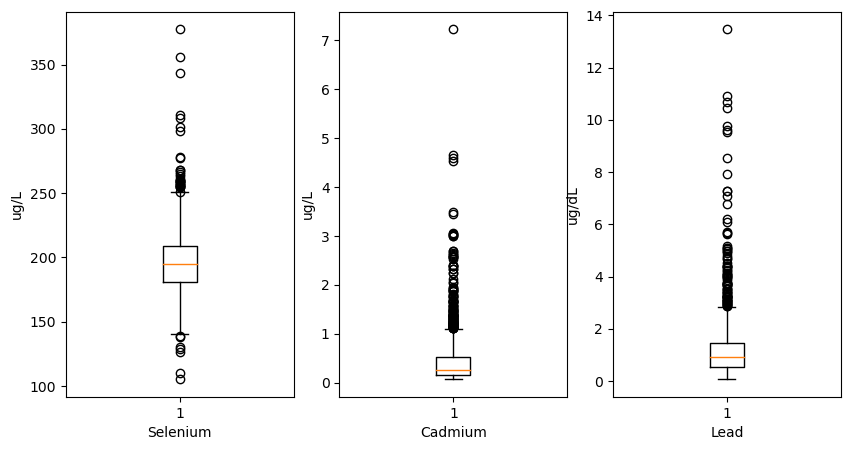

In [28]:
# create three separate boxplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].boxplot(red_lab_df["selenium(ug/L)"])
axs[0].set_xlabel("Selenium")
axs[0].set_ylabel("ug/L")

axs[1].boxplot(red_lab_df["cadmium(ug/L)"])
axs[1].set_xlabel("Cadmium")
axs[1].set_ylabel("ug/L")

axs[2].boxplot(red_lab_df["lead(ug/dL)"])
axs[2].set_xlabel("Lead")
axs[2].set_ylabel("ug/dL")

plt.show()

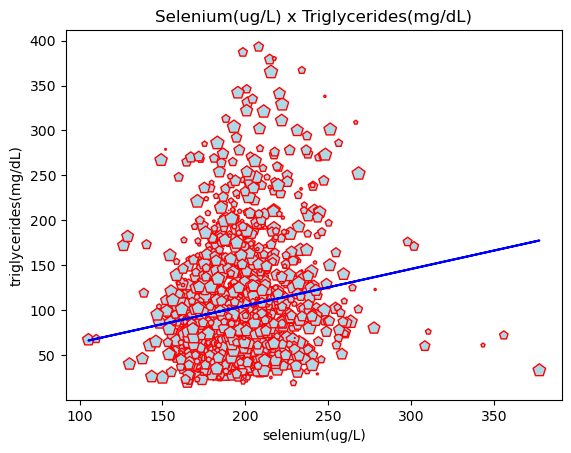

In [29]:
size = [random.uniform(0,1)*100 for _ in (red_lab_df["selenium(ug/L)"])]
##print(size)
##plt.scatter(df2["selenium(ug/L)"], df2["triglycerides(mg/dL)"], marker= "o", facecolors= "lightblue", edgecolors= "red ", s= size)

plt.scatter(red_lab_df["selenium(ug/L)"], red_lab_df["triglycerides(mg/dL)"], marker= "p", facecolors= ["lightblue"], edgecolors= ["red"], s= size)

# Add linear regression line
model = LinearRegression()
model.fit(red_lab_df["selenium(ug/L)"].values.reshape(-1, 1), red_lab_df["triglycerides(mg/dL)"])
x_line = red_lab_df["selenium(ug/L)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title
plt.xlabel("selenium(ug/L)")
plt.ylabel("triglycerides(mg/dL)")
plt.title("Selenium(ug/L) x Triglycerides(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()

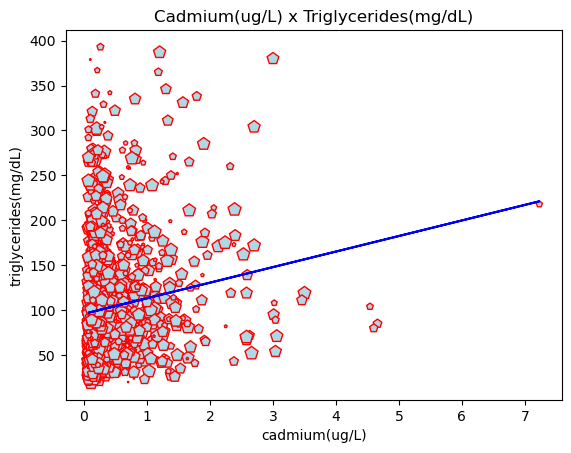

In [30]:
size = [random.uniform(0, 1) * 100 for _ in (red_lab_df["cadmium(ug/L)"])]
plt.scatter(red_lab_df["cadmium(ug/L)"], red_lab_df["triglycerides(mg/dL)"], marker="p", facecolors=["lightblue"], edgecolors=["red"], s=size)

# Add linear regression line
model = LinearRegression()
model.fit(red_lab_df["cadmium(ug/L)"].values.reshape(-1, 1), red_lab_df["triglycerides(mg/dL)"])
x_line = red_lab_df["cadmium(ug/L)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title 
plt.xlabel("cadmium(ug/L)")
plt.ylabel("triglycerides(mg/dL)")
plt.title("Cadmium(ug/L) x Triglycerides(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()

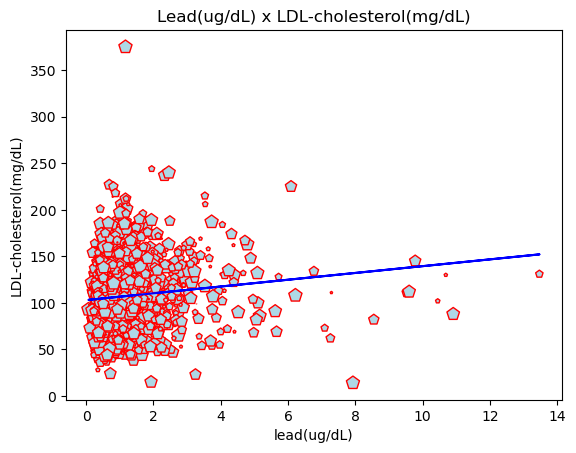

In [31]:
size = [random.uniform(0, 1) * 100 for _ in (red_lab_df["lead(ug/dL)"])]
plt.scatter(red_lab_df["lead(ug/dL)"], red_lab_df["LDL-cholesterol(mg/dL)"], marker="p", facecolors=["lightblue"], edgecolors=["red"], s=size)

# Add linear regression line
model = LinearRegression()
model.fit(red_lab_df["lead(ug/dL)"].values.reshape(-1, 1), red_lab_df["LDL-cholesterol(mg/dL)"])
x_line = red_lab_df["lead(ug/dL)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title 
plt.xlabel("lead(ug/dL)")
plt.ylabel("LDL-cholesterol(mg/dL)")
plt.title("Lead(ug/dL) x LDL-cholesterol(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()

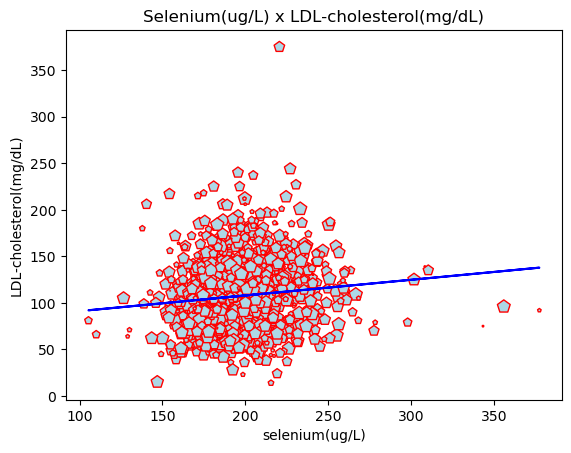

In [32]:
size = [random.uniform(0, 1) * 100 for _ in (red_lab_df["selenium(ug/L)"])]
plt.scatter(red_lab_df["selenium(ug/L)"], red_lab_df["LDL-cholesterol(mg/dL)"], marker="p", facecolors=["lightblue"], edgecolors=["red"], s=size)

# Add linear regression line
model = LinearRegression()
model.fit(red_lab_df["selenium(ug/L)"].values.reshape(-1, 1), red_lab_df["LDL-cholesterol(mg/dL)"])
x_line = red_lab_df["selenium(ug/L)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title 
plt.xlabel("selenium(ug/L)")
plt.ylabel("LDL-cholesterol(mg/dL)")
plt.title("Selenium(ug/L) x LDL-cholesterol(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()

# First Analysis

After analyzing the chosen biomarkers in the dataset, no meaningful correlations were found with the blood metal concentrations. As a result, we are including new heart biomarkers in the dataset, which are reported in the literature to be related to the consumption of heavy metals. By doing so, we hope to gain a better understanding of the possible effects of heavy metal exposure on heart health.

Sources:
- https://www.ahajournals.org/doi/full/10.1161/JAHA.119.013571
- https://www.heart.org/en/health-topics/cholesterol/about-cholesterol
- https://pubmed.ncbi.nlm.nih.gov/?term=heavy+metals+and+cardiovascular+disease+biomarkers&filter=years.2021-2023

New biomarkers:
- "Diastolic Blood pressure (first reading) mmHg",
- "BPXDI2":"Diastolic Blood pressure (second reading) mmHg",
- "BPXSY1":"Systolic Blood pressure (first reading) mmHg",
- "BPXSY2":"Systolic Blood pressure (second reading) mmHg",
- "LBXGH":"Glycohemoglobin(%)",

In [95]:
# File to Load 
examination_to_load = "../Resource/examination.csv"
exam_data = pd.read_csv(examination_to_load, encoding='utf-8')

# Read Files and store into Pandas DataFrames 
exam_data = pd.read_csv(examination_to_load, encoding='utf-8')

exam_data.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [96]:
#clean dataframe
cols_to_clean = ['BPXDI1','BPXDI2','BPXSY1','BPXSY2']
#dropping the rows with null cells
for col in cols_to_clean:
    exam_data = exam_data.dropna(subset=[col])

In [97]:
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7072 entries, 0 to 9812
Columns: 224 entries, SEQN to CSAEFFRT
dtypes: float64(192), int64(3), object(29)
memory usage: 12.1+ MB


In [98]:
exam_data=exam_data.rename(columns={"SEQN":"patient ID"})

# Combine the data into a single dataset.  
complete_data=pd.merge(red_lab_df, exam_data, how="left", on=["patient ID"])
complete_data.head()

,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),triglycerides_class,LDL-cholesterol(mg/dL),LDL-cholesterol_class,PEASCST1,PEASCTM1,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73559,209.64,0.22,1.45,51.0,Normal,56.0,Normal,1.0,665.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
1,73564,195.62,0.37,1.00,64.0,Normal,97.0,Normal,1.0,954.0,...,3.0,1.0,2.0,3.0,4.0,NaN,NaN,12.0,1.0,1.0
2,73580,188.00,0.07,0.31,57.0,Normal,159.0,Borderline high,1.0,805.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73607,219.00,0.50,1.35,139.0,Normal,103.0,Normal,1.0,927.0,...,3.0,1.0,2.0,4.0,4.0,NaN,NaN,40.0,1.0,1.0
4,73621,212.84,0.36,1.38,78.0,Normal,70.0,Normal,1.0,703.0,...,2.0,1.0,4.0,3.0,2.0,NaN,NaN,38.0,1.0,3.0


In [99]:
#choosing only the desired fields
red_comp_data = complete_data[['patient ID', 'selenium(ug/L)', 'cadmium(ug/L)', 'lead(ug/dL)',
       'triglycerides(mg/dL)', 'triglycerides_class', 'LDL-cholesterol(mg/dL)',
       'LDL-cholesterol_class','BPXDI1','BPXDI2','BPXSY1','BPXSY2']]
red_comp_data.head()

,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),triglycerides_class,LDL-cholesterol(mg/dL),LDL-cholesterol_class,BPXDI1,BPXDI2,BPXSY1,BPXSY2
0,73559,209.64,0.22,1.45,51.0,Normal,56.0,Normal,90.0,76.0,140.0,140.0
1,73564,195.62,0.37,1.00,64.0,Normal,97.0,Normal,80.0,80.0,118.0,124.0
2,73580,188.00,0.07,0.31,57.0,Normal,159.0,Borderline high,84.0,66.0,124.0,118.0
3,73607,219.00,0.50,1.35,139.0,Normal,103.0,Normal,84.0,84.0,120.0,120.0
4,73621,212.84,0.36,1.38,78.0,Normal,70.0,Normal,72.0,66.0,134.0,136.0


In [100]:
#cleaning Glycohemoglobin(%) from labs.csv
df = df.dropna(subset=['LBXGH'])

df_LBXGH = df[["SEQN","LBXGH"]]

df_LBXGH = df_LBXGH.rename(columns={'SEQN': 'patient ID'})

df_LBXGH.head()

,patient ID,LBXGH
0,73557,13.9
1,73558,9.1
2,73559,8.9
4,73561,4.9
5,73562,5.5


In [101]:
#adding Glycohemoglobin(%) from labs.csv
merged_data = pd.merge(red_comp_data, df_LBXGH, on='patient ID')
merged_data.head()

,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),triglycerides_class,LDL-cholesterol(mg/dL),LDL-cholesterol_class,BPXDI1,BPXDI2,BPXSY1,BPXSY2,LBXGH
0,73559,209.64,0.22,1.45,51.0,Normal,56.0,Normal,90.0,76.0,140.0,140.0,8.9
1,73564,195.62,0.37,1.00,64.0,Normal,97.0,Normal,80.0,80.0,118.0,124.0,5.5
2,73580,188.00,0.07,0.31,57.0,Normal,159.0,Borderline high,84.0,66.0,124.0,118.0,5.8
3,73607,219.00,0.50,1.35,139.0,Normal,103.0,Normal,84.0,84.0,120.0,120.0,5.0
4,73621,212.84,0.36,1.38,78.0,Normal,70.0,Normal,72.0,66.0,134.0,136.0,5.6


In [102]:
 #renaming the variables
comp_data=merged_data.rename(columns={
    "BPXDI1":"Diastolic Blood pressure (first reading) mmHg",
    "BPXDI2":"Diastolic Blood pressure (second reading) mmHg",
    "BPXSY1":"Systolic Blood pressure (first reading) mmHg",
    "BPXSY2":"Systolic Blood pressure (second reading) mmHg",
    "LBXGH":"Glycohemoglobin(%)",
    
})

comp_data.head()

,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),triglycerides_class,LDL-cholesterol(mg/dL),LDL-cholesterol_class,Diastolic Blood pressure (first reading) mmHg,Diastolic Blood pressure (second reading) mmHg,Systolic Blood pressure (first reading) mmHg,Systolic Blood pressure (second reading) mmHg,Glycohemoglobin(%)
0,73559,209.64,0.22,1.45,51.0,Normal,56.0,Normal,90.0,76.0,140.0,140.0,8.9
1,73564,195.62,0.37,1.00,64.0,Normal,97.0,Normal,80.0,80.0,118.0,124.0,5.5
2,73580,188.00,0.07,0.31,57.0,Normal,159.0,Borderline high,84.0,66.0,124.0,118.0,5.8
3,73607,219.00,0.50,1.35,139.0,Normal,103.0,Normal,84.0,84.0,120.0,120.0,5.0
4,73621,212.84,0.36,1.38,78.0,Normal,70.0,Normal,72.0,66.0,134.0,136.0,5.6


In [103]:
# Create new columns with the averages of diastolic blood pressure readings
comp_data['Diastolic Blood pressure (average) mmHg'] = (comp_data['Diastolic Blood pressure (first reading) mmHg'] + comp_data['Diastolic Blood pressure (second reading) mmHg']) / 2

# Create new columns with the averages of systolic blood pressure readings
comp_data['Systolic Blood pressure (average) mmHg'] = (comp_data['Systolic Blood pressure (first reading) mmHg'] + comp_data['Systolic Blood pressure (second reading) mmHg']) / 2

comp_data.head()

,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),triglycerides_class,LDL-cholesterol(mg/dL),LDL-cholesterol_class,Diastolic Blood pressure (first reading) mmHg,Diastolic Blood pressure (second reading) mmHg,Systolic Blood pressure (first reading) mmHg,Systolic Blood pressure (second reading) mmHg,Glycohemoglobin(%),Diastolic Blood pressure (average) mmHg,Systolic Blood pressure (average) mmHg
0,73559,209.64,0.22,1.45,51.0,Normal,56.0,Normal,90.0,76.0,140.0,140.0,8.9,83.0,140.0
1,73564,195.62,0.37,1.00,64.0,Normal,97.0,Normal,80.0,80.0,118.0,124.0,5.5,80.0,121.0
2,73580,188.00,0.07,0.31,57.0,Normal,159.0,Borderline high,84.0,66.0,124.0,118.0,5.8,75.0,121.0
3,73607,219.00,0.50,1.35,139.0,Normal,103.0,Normal,84.0,84.0,120.0,120.0,5.0,84.0,120.0
4,73621,212.84,0.36,1.38,78.0,Normal,70.0,Normal,72.0,66.0,134.0,136.0,5.6,69.0,135.0


In [104]:
# Drop the columns for the first and second readings of diastolic and systolic blood pressure
final_marker_df = comp_data.drop(['Diastolic Blood pressure (first reading) mmHg', 'Diastolic Blood pressure (second reading) mmHg', 'Systolic Blood pressure (first reading) mmHg', 'Systolic Blood pressure (second reading) mmHg'], axis=1)
final_marker_df.head()

,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),triglycerides_class,LDL-cholesterol(mg/dL),LDL-cholesterol_class,Glycohemoglobin(%),Diastolic Blood pressure (average) mmHg,Systolic Blood pressure (average) mmHg
0,73559,209.64,0.22,1.45,51.0,Normal,56.0,Normal,8.9,83.0,140.0
1,73564,195.62,0.37,1.00,64.0,Normal,97.0,Normal,5.5,80.0,121.0
2,73580,188.00,0.07,0.31,57.0,Normal,159.0,Borderline high,5.8,75.0,121.0
3,73607,219.00,0.50,1.35,139.0,Normal,103.0,Normal,5.0,84.0,120.0
4,73621,212.84,0.36,1.38,78.0,Normal,70.0,Normal,5.6,69.0,135.0


In [105]:
# Define the bin edges for diastolic and systolic blood pressure acccording to "https://www.mayoclinichealthsystem.org/hometown-health/speaking-of-health/know-your-numbers-blood-pressure"
diastolic_bins = [0, 80, 89, 129, np.inf]
systolic_bins = [0, 120, 129, 139, np.inf]
labels=['Normal', 'Elevated', 'Hypertension stage 1', 'Hypertension stage 2']

# Create new columns with the bin labels for diastolic and systolic blood pressure
final_marker_df['Diastolic Blood pressure_class'] = pd.cut(final_marker_df['Diastolic Blood pressure (average) mmHg'], bins=diastolic_bins, labels = labels)
final_marker_df['Systolic Blood pressure_class'] = pd.cut(final_marker_df['Systolic Blood pressure (average) mmHg'], bins=systolic_bins, labels = labels)

# Re-organize columns 
final_marker_df = final_marker_df[['patient ID', 'selenium(ug/L)', 'cadmium(ug/L)', 'lead(ug/dL)',
       'triglycerides(mg/dL)', 'triglycerides_class', 'LDL-cholesterol(mg/dL)',
       'LDL-cholesterol_class', 'Glycohemoglobin(%)',
       'Diastolic Blood pressure (average) mmHg',
       'Diastolic Blood pressure_class',
       'Systolic Blood pressure (average) mmHg', 
       'Systolic Blood pressure_class']]

final_marker_df.head()

,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),triglycerides_class,LDL-cholesterol(mg/dL),LDL-cholesterol_class,Glycohemoglobin(%),Diastolic Blood pressure (average) mmHg,Diastolic Blood pressure_class,Systolic Blood pressure (average) mmHg,Systolic Blood pressure_class
0,73559,209.64,0.22,1.45,51.0,Normal,56.0,Normal,8.9,83.0,Elevated,140.0,Hypertension stage 2
1,73564,195.62,0.37,1.00,64.0,Normal,97.0,Normal,5.5,80.0,Normal,121.0,Elevated
2,73580,188.00,0.07,0.31,57.0,Normal,159.0,Borderline high,5.8,75.0,Normal,121.0,Elevated
3,73607,219.00,0.50,1.35,139.0,Normal,103.0,Normal,5.0,84.0,Elevated,120.0,Normal
4,73621,212.84,0.36,1.38,78.0,Normal,70.0,Normal,5.6,69.0,Normal,135.0,Hypertension stage 1


In [106]:
final_marker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   patient ID                               1554 non-null   int64   
 1   selenium(ug/L)                           1554 non-null   float64 
 2   cadmium(ug/L)                            1554 non-null   float64 
 3   lead(ug/dL)                              1554 non-null   float64 
 4   triglycerides(mg/dL)                     1554 non-null   float64 
 5   triglycerides_class                      1554 non-null   category
 6   LDL-cholesterol(mg/dL)                   1554 non-null   float64 
 7   LDL-cholesterol_class                    1554 non-null   category
 8   Glycohemoglobin(%)                       1554 non-null   float64 
 9   Diastolic Blood pressure (average) mmHg  1410 non-null   float64 
 10  Diastolic Blood pressure_class      

In [107]:
#clean final dataframe
final_marker_df = final_marker_df.dropna()
final_marker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1404 entries, 0 to 1553
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   patient ID                               1404 non-null   int64   
 1   selenium(ug/L)                           1404 non-null   float64 
 2   cadmium(ug/L)                            1404 non-null   float64 
 3   lead(ug/dL)                              1404 non-null   float64 
 4   triglycerides(mg/dL)                     1404 non-null   float64 
 5   triglycerides_class                      1404 non-null   category
 6   LDL-cholesterol(mg/dL)                   1404 non-null   float64 
 7   LDL-cholesterol_class                    1404 non-null   category
 8   Glycohemoglobin(%)                       1404 non-null   float64 
 9   Diastolic Blood pressure (average) mmHg  1404 non-null   float64 
 10  Diastolic Blood pressure_class           

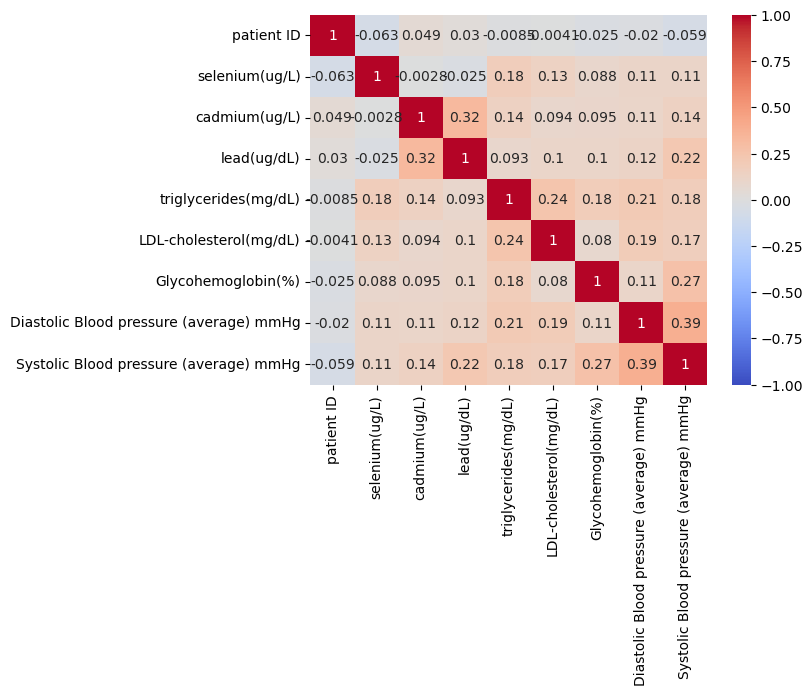

In [110]:
# Drop string columns from the DataFrame
num_df = final_marker_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = num_df.corr()

# Create the heatmap
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

# Show the plot
plt.show()

In [111]:
# set diagonal elements to zero
corr_matrix.values[[i for i in range(corr_matrix.shape[0])], [i for i in range(corr_matrix.shape[0])]] = 0

# print the correlation matrix with diagonal elements set to zero
print(corr_matrix)

                                         patient ID  selenium(ug/L)   
patient ID                                 0.000000       -0.062634  \
selenium(ug/L)                            -0.062634        0.000000   
cadmium(ug/L)                              0.048885       -0.002789   
lead(ug/dL)                                0.029569       -0.025359   
triglycerides(mg/dL)                      -0.008517        0.176317   
LDL-cholesterol(mg/dL)                    -0.004117        0.133843   
Glycohemoglobin(%)                        -0.024562        0.087757   
Diastolic Blood pressure (average) mmHg   -0.020453        0.110471   
Systolic Blood pressure (average) mmHg    -0.058692        0.113081   

                                         cadmium(ug/L)  lead(ug/dL)   
patient ID                                    0.048885     0.029569  \
selenium(ug/L)                               -0.002789    -0.025359   
cadmium(ug/L)                                 0.000000     0.323813   
lead(

In [114]:
# stack the correlation matrix and sort by correlation coefficient
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# print the top 10 correlation pairs
print(corr_pairs[:25])

Systolic Blood pressure (average) mmHg   Diastolic Blood pressure (average) mmHg    0.385638
Diastolic Blood pressure (average) mmHg  Systolic Blood pressure (average) mmHg     0.385638
lead(ug/dL)                              cadmium(ug/L)                              0.323813
cadmium(ug/L)                            lead(ug/dL)                                0.323813
Systolic Blood pressure (average) mmHg   Glycohemoglobin(%)                         0.269607
Glycohemoglobin(%)                       Systolic Blood pressure (average) mmHg     0.269607
LDL-cholesterol(mg/dL)                   triglycerides(mg/dL)                       0.243293
triglycerides(mg/dL)                     LDL-cholesterol(mg/dL)                     0.243293
Systolic Blood pressure (average) mmHg   lead(ug/dL)                                0.224982
lead(ug/dL)                              Systolic Blood pressure (average) mmHg     0.224982
triglycerides(mg/dL)                     Diastolic Blood pressure (ave

In [ ]:
#according to the heat map, the best correlation is between "lead(ug/dL)" and "Systolic Blood pressure (average) mmHg"

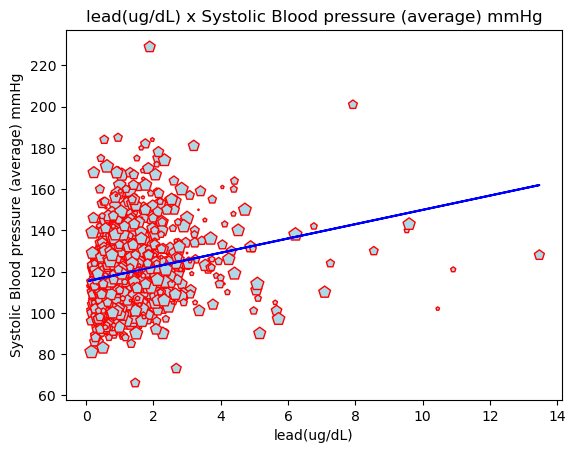

In [115]:
#Linear regression and scatter plot for best correlation
size = [random.uniform(0,1)*100 for _ in (final_marker_df["lead(ug/dL)"])]

plt.scatter(final_marker_df["lead(ug/dL)"], final_marker_df["Systolic Blood pressure (average) mmHg"], marker= "p", facecolors= ["lightblue"], edgecolors= ["red"], s= size)

# Add linear regression line
model = LinearRegression()
model.fit(final_marker_df["lead(ug/dL)"].values.reshape(-1, 1), final_marker_df["Systolic Blood pressure (average) mmHg"])
x_line = final_marker_df["lead(ug/dL)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title
plt.xlabel("lead(ug/dL)")
plt.ylabel("Systolic Blood pressure (average) mmHg")
plt.title("lead(ug/dL) x Systolic Blood pressure (average) mmHg")
plt.savefig("myGraph.png")

# Show the plot
plt.show()